In [29]:
raw_data <- read.csv("SSL_RAT_SEX_Code_Full.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 398627

In [30]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','SEX_CODE_CD')]

In [31]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 398525

In [32]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD
500,1,20-30,0,1,4,1,1,1.0,1,1
500,1,less than 20,1,2,2,1,7,0.2,1,1
500,1,20-30,4,3,0,1,0,-1.1,0,1
500,1,less than 20,0,1,3,1,2,0.1,1,1
500,1,less than 20,1,2,6,0,0,0.0,0,1
500,1,less than 20,1,1,4,1,1,-0.3,2,1


In [33]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [34]:
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,96295,283.4904,0.1697686
1,302230,278.7586,0.1080395


In [35]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,96295,190375.6,356.2857
1,302230,200479.6,212.1823


In [36]:
# T-test without PSM for SSL_SCORE and SEX_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~SEX_CODE_CD)

The following objects are masked from matched:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK




	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = 23.514, df = 180650, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.337375 5.126191
sample estimates:
mean in group 0 mean in group 1 
       283.4904        278.7586 


In [37]:
# T-test without PSM for SSL_SCORE_RANK and SEX_CODE_CD
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = -24.366, df = 169900, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10916.77  -9291.24
sample estimates:
mean in group 0 mean in group 1 
       190375.6        200479.6 


In [38]:
mod_match <- matchit(SEX_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST+PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [39]:
mod_match


Call: 
matchit(formula = SEX_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All         96295  302230
Matched     96295   96295
Unmatched       0  205935
Discarded       0       0


In [40]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

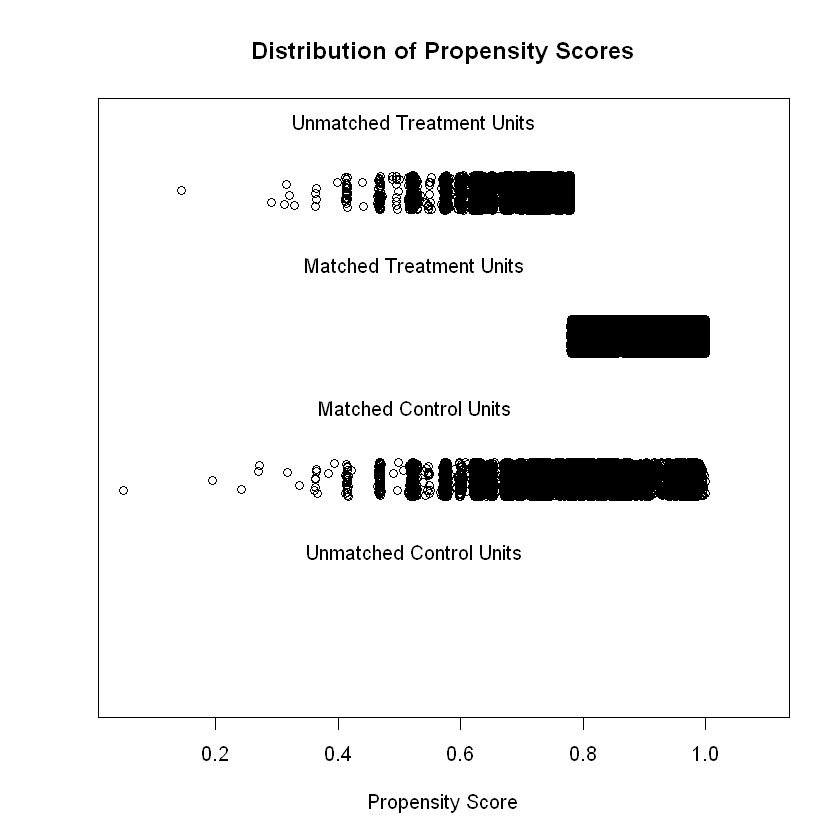

In [41]:
plot(mod_match, type = "jitter")

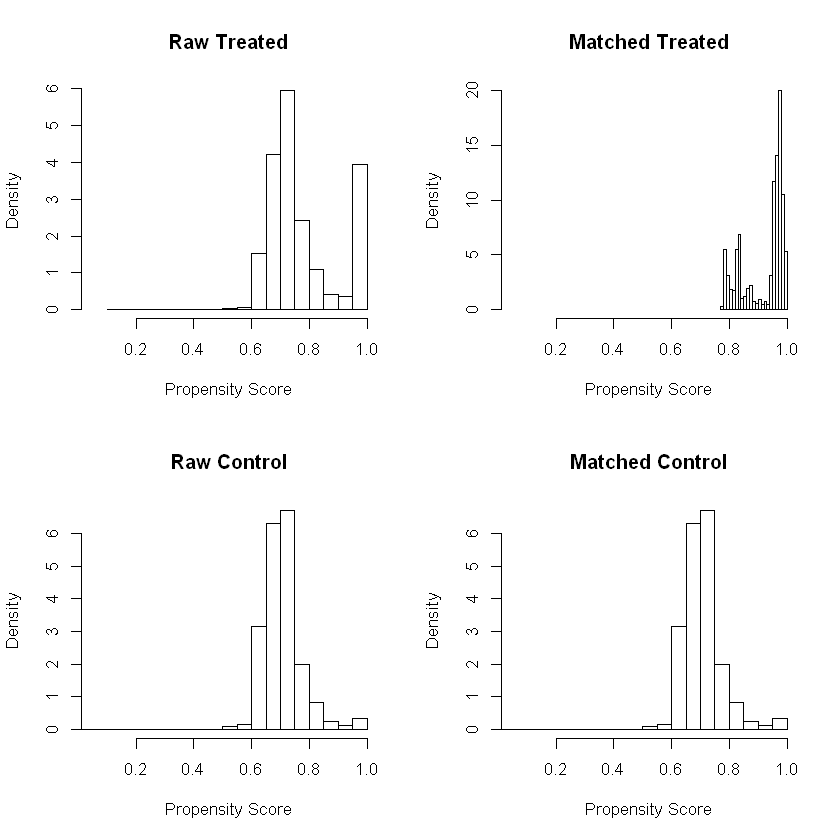

In [42]:
plot(mod_match, type = "hist")

In [43]:
head(matched)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,distance,weights
500,1,20-30,0,1,4,1,1,1.0,1,1,0.9935183,1
500,1,less than 20,1,2,2,1,7,0.2,1,1,0.9984339,1
500,1,20-30,4,3,0,1,0,-1.1,0,1,0.9981349,1
500,1,less than 20,0,1,3,1,2,0.1,1,1,0.9904509,1
500,1,less than 20,1,2,6,0,0,0.0,0,1,0.9796667,1
500,1,less than 20,1,1,4,1,1,-0.3,2,1,0.9977846,1


In [44]:
# Doing T - test on matched records
options(warn=-1)
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from matched (pos = 4):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK, weights



In [45]:
gender_female <-subset(matched,SEX_CODE_CD == 0)
gender_male<-subset(matched,SEX_CODE_CD == 1)

In [46]:
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = 13.398, df = 173630, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.355939 4.506110
sample estimates:
mean in group 0 mean in group 1 
       283.4904        279.5593 


In [47]:
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = -6.9309, df = 186510, p-value = 4.197e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4948.726 -2766.840
sample estimates:
mean in group 0 mean in group 1 
       190375.6        194233.4 
